In [2]:
import numpy as np
import pandas as pd

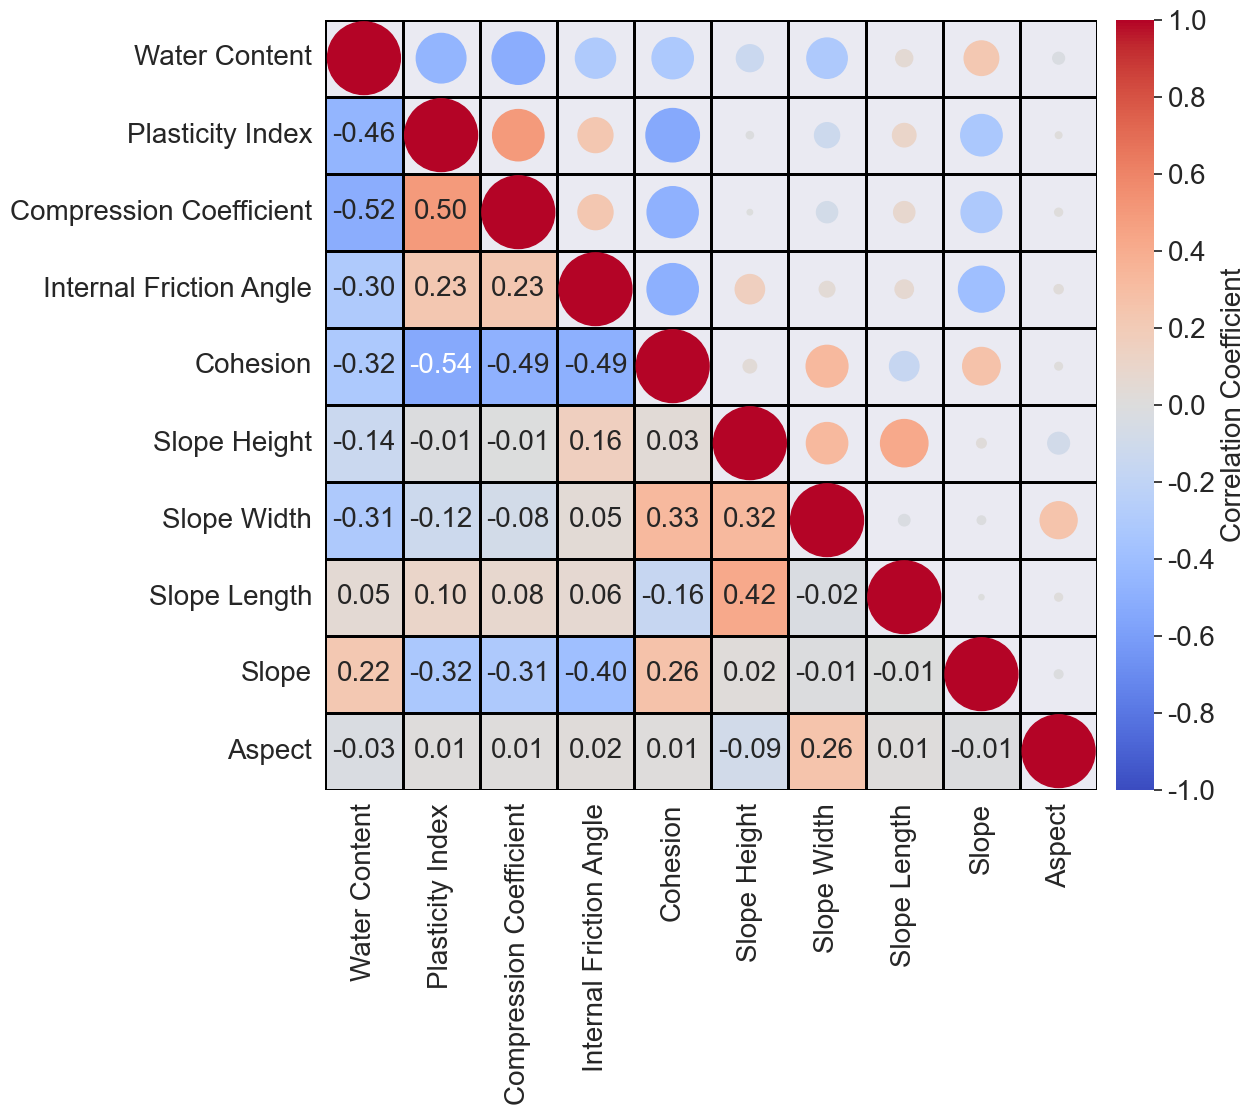

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import LabelEncoder,StandardScaler
sns.set_theme()

pos=pd.read_csv('pos_eng_.csv')
neg=pd.read_csv('neg_eng_.csv')

features=pos.iloc[:,10:-2]

# encoder=LabelEncoder()
# features.iloc[:,-1] = encoder.fit_transform(features.iloc[:,-1])

corr_matrix=features.corr('pearson')

cmap = plt.get_cmap('coolwarm')
norm = mcolors.Normalize(vmin=-1, vmax=1)
scalar_map = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

mask_upper = np.triu(np.ones_like(corr_matrix, dtype=bool), k=0)

plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr_matrix, vmin=-1, vmax=1, mask=mask_upper, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size': 20},
                 linewidths=1, linecolor='black', cbar_kws={'ticks': np.arange(-1,1.1,0.2),'pad': 0.02})

for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        if i <= j:
            size = np.abs(corr_matrix.iloc[i, j])*0.7  
            color = scalar_map.to_rgba(corr_matrix.iloc[i, j])
            circle = plt.Circle((j + 0.5, i + 0.5), np.sqrt(size / np.pi), color=color)
            ax.add_patch(circle)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Correlation Coefficient',size=20)
plt.savefig('/Users/cwf/Desktop/相关性.pdf',bbox_inches='tight')

In [6]:
threshold = 0.8

high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > threshold:
            col_pair = (corr_matrix.columns[i], corr_matrix.columns[j])
            high_corr_pairs.append(col_pair)

# 打印高相关性的特征对
for pair in high_corr_pairs:
    print(pair)

In [7]:
data=pd.concat([pos,neg],axis=0,ignore_index=True)
hcy=data[data['Lithology']=='Igneous']
cjy=data[data['Lithology']=='Sedimentary']
print('Igneous',len(hcy),'  Sedimentary',len(cjy))
# drop=['Plastic Limit','Liquid Limit','Plasticity Index']
drop=[]

Igneous 804   Sedimentary 1608


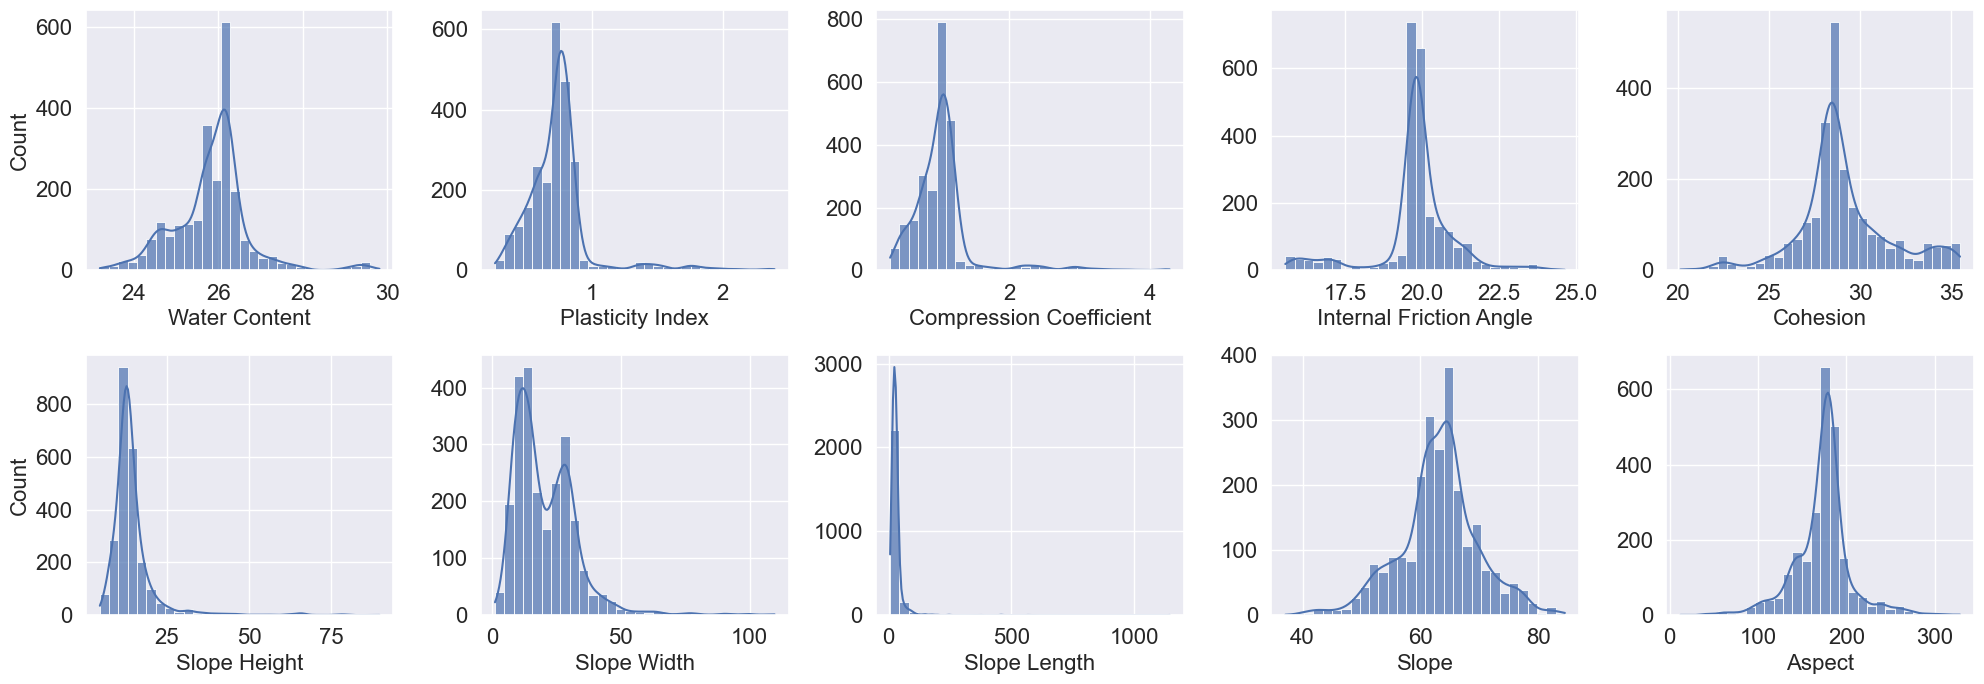

In [49]:
fig, axes = plt.subplots(2, 5, figsize=(20, 7))
axes = axes.flatten()

for i, feature in enumerate(data.drop(columns=drop).columns[10:-2]):
    sns.histplot(
        data.drop(columns=drop)[feature].dropna(),
        kde=True,
        bins=30,
        ax=axes[i],
        stat="count",
        alpha=0.7
    )
    axes[i].set_xlabel(feature,fontsize=16)
    axes[i].tick_params('both',labelsize=16)
    # if feature=='Slope Length':
    #     axes[i].set_xscale('log')
    if i==0 or i==5:
        axes[i].set_ylabel("Count",fontsize=16)
    else:
        axes[i].set_ylabel('')

plt.tight_layout()

Water Content            Plasticity Index            \
                      min        max              min       max   
Lithology                                                         
Igneous         23.191763  28.972141         0.257128  2.394409   
Sedimentary     23.387760  29.814732         0.311127  2.200050   

            Compression Coefficient           Internal Friction Angle  \
                                min       max                     min   
Lithology                                                               
Igneous                    0.305745  4.276155               15.562805   
Sedimentary                0.366004  3.834859               15.597026   

                         Cohesion            Slope Height             \
                   max        min        max          min        max   
Lithology                                                              
Igneous      24.634499  20.144167  35.470161     6.063602  61.899281   
Sedimentary  23.953112  21.981537  35.447521     4.495175  89.778397   

            Slope Width             Slope Length                   Slope  \
                    min         max          min          max        min   
Lithology                                                                  
Igneous        7.074316   99.878426     8.078689    88.183762  47.110867   
Sedimentary    1.067272  109.697403     6.470002  1146.108154  37.067162   

                           Aspect              
                   max        min         max  
Lithology                                      
Igneous      81.946655  12.071455  304.842682  
Sedimentary  84.492249  41.038174  328.554352

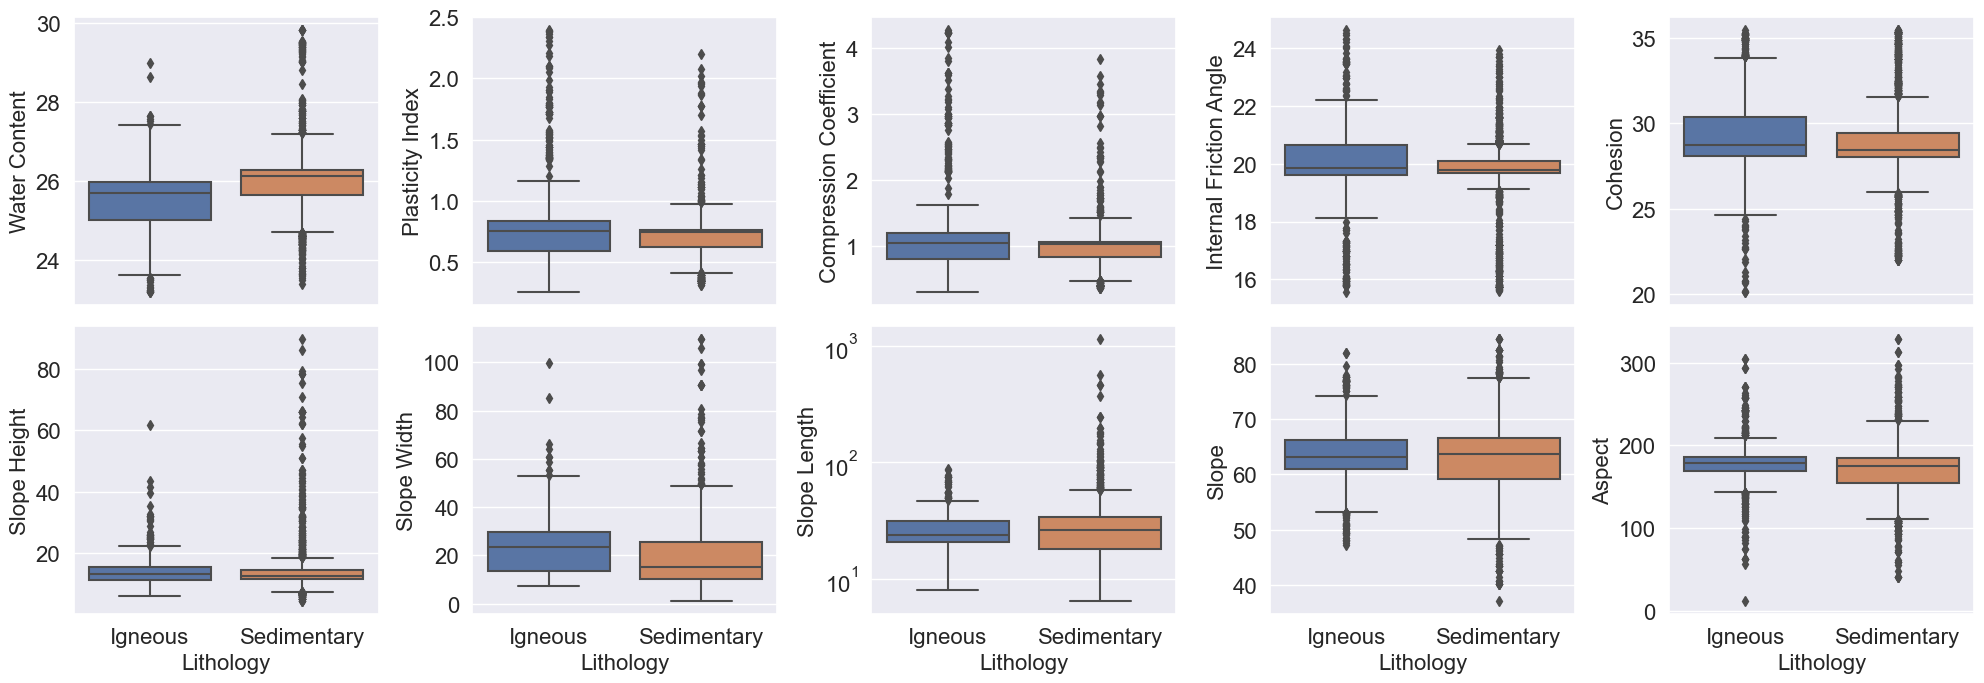

In [ ]:
plt.figure(figsize=(20, 7))
for i, column in enumerate(data.drop(columns=drop).columns[10:-2]):  # Skipping the first column (rock type)
    plt.subplot(2, 5, i+1)
    sns.boxplot(x='Lithology', y=column, data=data.drop(columns=drop))
    plt.ylabel(column,fontsize=16)
    if column=='Slope Length':
        plt.yscale('log')
    plt.tick_params('y',labelsize=16)
    if i//5==1:
        plt.tick_params('x',labelsize=16)
        plt.xlabel('Lithology',fontsize=16)
    else:
        plt.tick_params('x',labelbottom=False)
        plt.xlabel('')
plt.tight_layout()

# Calculate the range of values for each attribute by rock type
range_by_rock_type = data.drop(columns=drop).groupby('Lithology').agg(['min', 'max']).iloc[:,20:-2]
range_by_rock_type

Aspect: 5.320565468424467
Slope Length: 3.5502401846860154
Water Content: 2.692640258795097
Internal Friction Angle: 2.1961317788012407
Compression Coefficient: 0.3965850982008795
Slope: 0.2839340502902059
Plasticity Index: 0.23797951964917166
Cohesion: 0.21628781122778457
Slope Height: 0.10383051188027012
Slope Width: 0.056381929465534546
['Aspect', 'Slope Length', 'Water Content', 'Internal Friction Angle', 'Compression Coefficient', 'Slope', 'Plasticity Index', 'Cohesion', 'Slope Height', 'Slope Width']


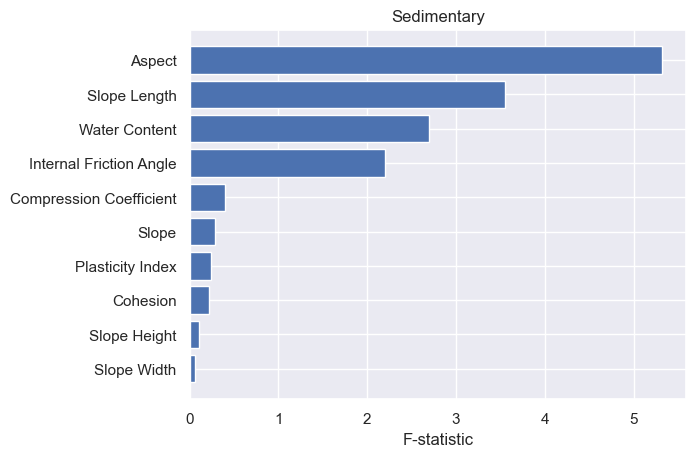

In [96]:
from sklearn.feature_selection import f_classif

Xf=cjy.iloc[:,10:-2]
Xf=Xf.drop(columns=drop)
yf=cjy.iloc[:,0]
# encoder=LabelEncoder()
# Xf.iloc[:,-1] = encoder.fit_transform(Xf.iloc[:,-1])

f_values,p_values=f_classif(Xf,yf)
# 将特征名和F统计量组合起来
features_importance = zip(Xf.columns, f_values)
# 对特征进行排序
sorted_features = sorted(features_importance, key=lambda x: x[1], reverse=True)
# 打印排序后的特征及其F统计量
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")
top_features = [feature for feature, score in sorted_features[:10]]
print(top_features)
sf = [feature for feature, score in sorted_features]
ss = [score for feature, score in sorted_features]
sns.set_style('darkgrid')
# plt.figure(figsize=(10, 6))
plt.barh(np.arange(Xf.shape[1]),ss,tick_label=sf)
plt.title('Sedimentary')
plt.xlabel('F-statistic')
plt.gca().invert_yaxis()
# plt.savefig('/Users/cwf/Desktop/广东项目/论文/figs/fs.pdf',bbox_inches='tight')

Train accuracy:  100.0 %
Test accuracy:  94.099 %


Text(0.5, 1.0, 'Testing (0.9410)')

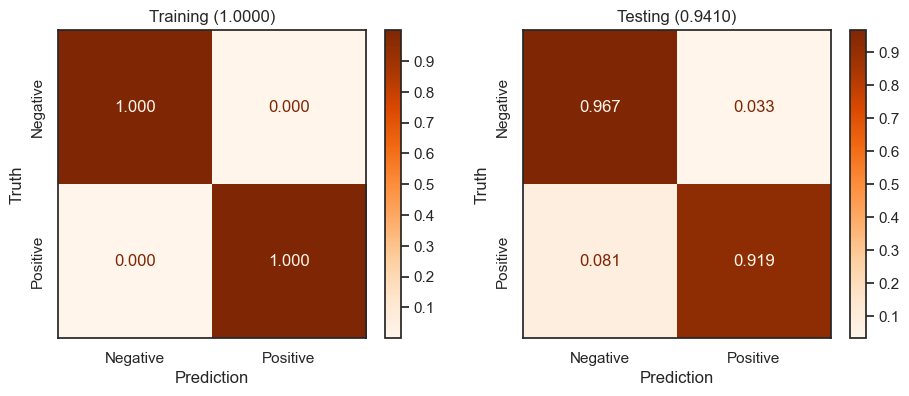

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix

X=cjy.iloc[:,5:-2]
y=cjy.iloc[:,0]

Xtrain,Xtest,ytrain,ytest=train_test_split(X_scaled,y,test_size=0.2,random_state=7) #5，7
clf=RandomForestClassifier()
clf.fit(Xtrain,ytrain)
ypre=clf.predict(Xtrain)
ypred=clf.predict(Xtest)
acc_train=accuracy_score(ytrain,ypre)*100
acc_test=accuracy_score(ytest,ypred)*100
print('Train accuracy: ',round(acc_train,3),'%')
print('Test accuracy: ',round(acc_test,3),'%')

sns.set_style('white')
fig,axes=plt.subplots(1,2,figsize=(11,4))
ConfusionMatrixDisplay.from_predictions(ytrain,ypre,normalize='true',values_format='.3f',display_labels=['Negative','Positive'],ax=axes[0],cmap='Oranges')
axes[0].images[0].colorbar.set_ticks(np.arange(0.1,1,0.1))
axes[0].set_yticklabels(axes[0].get_yticklabels(),rotation=90,va='center')
axes[0].set_xlabel('Prediction')
axes[0].set_ylabel('Truth')
axes[0].set_title('Training (%.4f)'%(acc_train/100))
ConfusionMatrixDisplay.from_predictions(ytest,ypred,normalize='true',values_format='.3f',display_labels=['Negative','Positive'],ax=axes[1],cmap='Oranges')
axes[1].images[0].colorbar.set_ticks(np.arange(0.1,1,0.1))
axes[1].set_yticklabels(axes[0].get_yticklabels(),rotation=90,va='center')
axes[1].set_xlabel('Prediction')
axes[1].set_ylabel('Truth')
axes[1].set_title('Testing (%.4f)'%(acc_test/100))

In [115]:
from skopt.space import Integer,Real
from skopt import BayesSearchCV

search_space = {'n_estimators': Integer(100, 500),
                'max_depth': Integer(2, 100)}
              
bayes_cv_tuner = BayesSearchCV(estimator=RandomForestClassifier(),
                               search_spaces=search_space,
                               n_iter=50,
                               cv=10,
                               n_jobs=-1)
bayes_cv_tuner.fit(Xtrain, ytrain)
print("Best parameters: ", bayes_cv_tuner.best_params_)
bt=bayes_cv_tuner.best_estimator_
best_ypred=bt.predict_proba(Xtest)[:,1]
best_ypred=np.where(best_ypred>0.4,1,0)
best_acc_test=accuracy_score(ytest,best_ypred)*100
print('Test accuracy: ',round(best_acc_test,3),'%')

/Users/cwf/miniforge3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/cwf/miniforge3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/cwf/miniforge3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best parameters:  OrderedDict([('max_depth', 100), ('n_estimators', 120)])
Test accuracy:  93.478 %


Train accuracy:  100.0 %


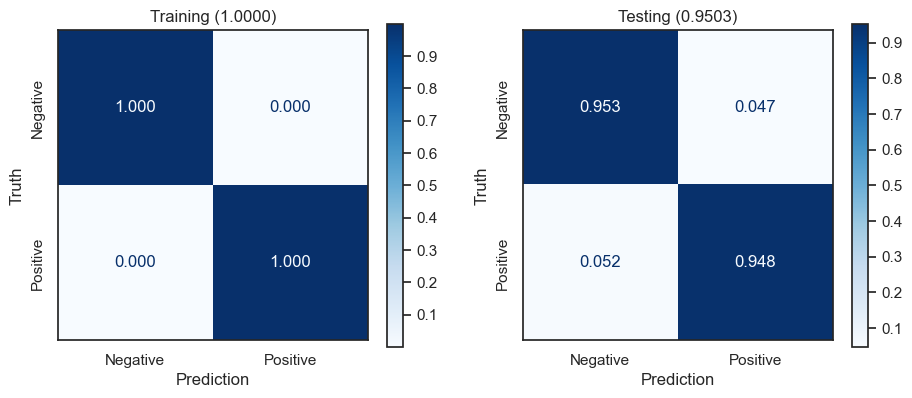

In [116]:
best_clf=bayes_cv_tuner.best_estimator_

best_ypre=best_clf.predict(Xtrain)
best_acc_train=accuracy_score(ytrain,best_ypre)*100
print('Train accuracy: ',round(best_acc_train,3),'%')
best_ypred=best_clf.predict_proba(Xtest)[:,1]
best_ypred=np.where(best_ypred>0.4,1,0)
best_acc_test=accuracy_score(ytest,best_ypred)*100
# print('Test accuracy: ',round(best_acc_test,3),'%')

sns.set_style('white')
fig,axes=plt.subplots(1,2,figsize=(11,4.2))
ConfusionMatrixDisplay.from_estimator(best_clf,Xtrain,ytrain,normalize='true',values_format='.3f',display_labels=['Negative','Positive'],ax=axes[0],cmap='Blues')
axes[0].images[0].colorbar.set_ticks(np.arange(0.1,1,0.1))
axes[0].set_yticklabels(axes[0].get_yticklabels(),rotation=90,va='center')
axes[0].set_xlabel('Prediction')
axes[0].set_ylabel('Truth')
axes[0].set_title('Training (%.4f)'%(best_acc_train/100))
ConfusionMatrixDisplay.from_predictions(ytest,best_ypred,normalize='true',values_format='.3f',display_labels=['Negative','Positive'],ax=axes[1],cmap='Blues')
axes[1].images[0].colorbar.set_ticks(np.arange(0.1,1,0.1))
axes[1].set_yticklabels(axes[0].get_yticklabels(),rotation=90,va='center')
axes[1].set_xlabel('Prediction')
axes[1].set_ylabel('Truth')
axes[1].set_title('Testing (%.4f)'%(best_acc_test/100))

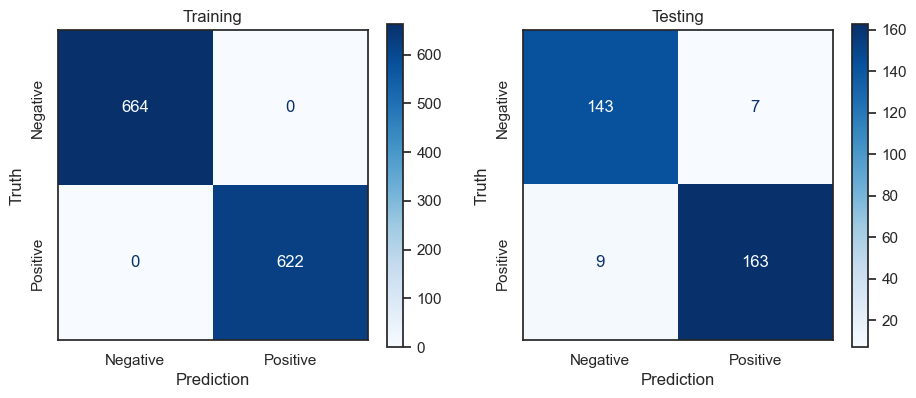

In [117]:
sns.set_style('white')
fig,axes=plt.subplots(1,2,figsize=(11,4.2))

ConfusionMatrixDisplay.from_estimator(best_clf,Xtrain,ytrain,display_labels=['Negative','Positive'],ax=axes[0],cmap='Blues')
axes[0].set_yticklabels(axes[0].get_yticklabels(),rotation=90,va='center')
axes[0].set_xlabel('Prediction')
axes[0].set_ylabel('Truth')
axes[0].set_title('Training')
ConfusionMatrixDisplay.from_predictions(ytest,best_ypred,display_labels=['Negative','Positive'],ax=axes[1],cmap='Blues')
axes[1].set_yticklabels(axes[0].get_yticklabels(),rotation=90,va='center')
axes[1].set_xlabel('Prediction')
axes[1].set_ylabel('Truth')
axes[1].set_title('Testing')

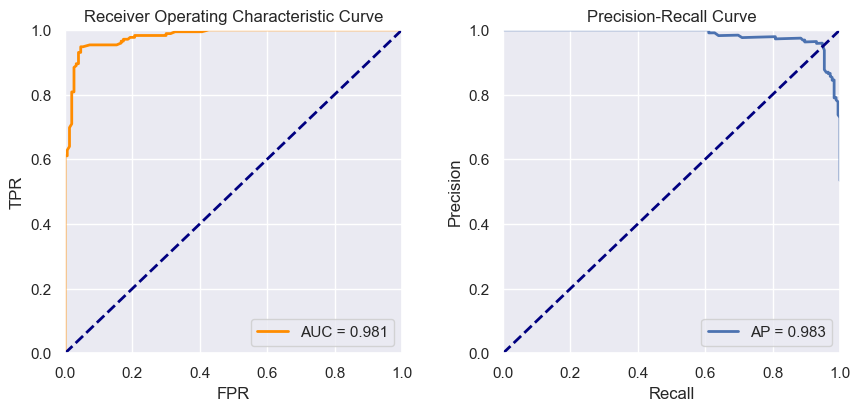

In [118]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

yprob = best_clf.predict_proba(Xtest)[:,1]
fpr, tpr, thd_roc = roc_curve(ytest, yprob)
roc_auc = auc(fpr, tpr)
precision, recall, thd_pr = precision_recall_curve(ytest, yprob)
average_precision = average_precision_score(ytest, yprob)

sns.set_style('darkgrid')
plt.figure(figsize=(10, 4.2))
plt.subplot(121)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.subplots_adjust(wspace=0.3)

plt.subplot(122)
plt.plot(recall, precision, color='b',lw=2,label='AP = {0:0.3f}'.format(average_precision))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')

In [119]:
from joblib import dump,load

dump(best_clf, "rf_cjy.joblib")

['rf_cjy.joblib']

80.0 130.0 175.0 280.0
122.80200791136488 200.66262220005962 314.3812613373102 500.10887415020613
172 150


/var/folders/59/ljhtbv7d0j14tb7y711spcbw0000gn/T/ipykernel_57015/742523253.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  te.iloc[:,-2] = 1  #火成岩0，沉积岩1


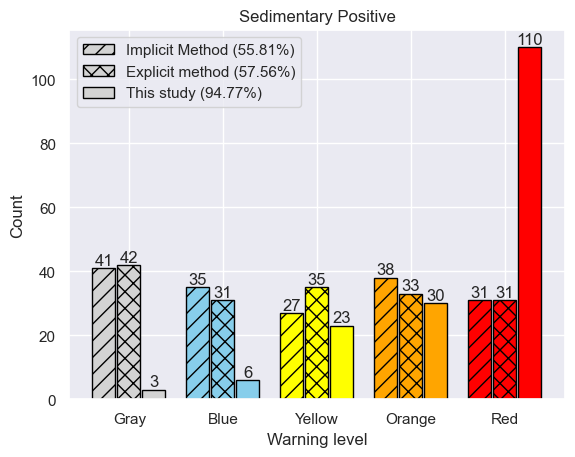

In [128]:
from sklearn.decomposition import PCA

def crp(rain):
    rp=np.zeros(len(rain))
    k=0.84
    n=1
    for i in range(len(rain.columns)):
        rp+=k**n*rain.values[:,i]
        n+=1
    return rp

r=crp(pos.iloc[:,5:10])
r1,r2,r3,r4=np.round(np.percentile(r,[20,40,60,80])/5)*5
print(r1,r2,r3,r4)

def m1(df):
    rp = crp(df)
    p = np.zeros(len(rp), dtype=int)
    p[rp < r1] = 0
    p[(rp >= r1) & (rp < r2)] = 1
    p[(rp >= r2) & (rp < r3)] = 2
    p[(rp >= r3) & (rp < r4)] = 3
    p[rp >= r4] = 4
    return p

pca=PCA(0.9)
dt=pos.iloc[:,-7:-1]
encoder=LabelEncoder().fit(dt.iloc[:,-1])
dt.iloc[:,-1] = encoder.transform(dt.iloc[:,-1])
sc=StandardScaler().fit(dt)
dt=sc.transform(dt)
pca_result = pca.fit_transform(dt)
f=np.sum(pca_result*pca.explained_variance_ratio_,axis=1)+1.5
T=f*(pos.iloc[:,5]+crp(pos.iloc[:,6:10]))
p1,p2,p3,p4=np.percentile(T,[20,40,60,80])
print(p1,p2,p3,p4)
# p1,p2,p3=np.percentile(f,[25,50,75])

def m2(df1,df2):
    df1=sc.transform(df1)
    df1_result=pca.transform(df1)
    f=np.sum(df1_result*pca.explained_variance_ratio_,axis=1)+1.5
    T=f*(df2.iloc[:,0]+crp(df2.iloc[:,1:]))
    pp = np.zeros(len(T), dtype=int)
    pp[T < p1] = 0
    pp[(T >= p1) & (T < p2)] = 1
    pp[(T >= p2) & (T < p3)] = 2
    pp[(T >= p3) & (T < p4)] = 3
    pp[T >= p4] = 4
    return pp

def m3(y):
    y1=np.zeros(len(y))
    y1[y<=0.2]=0
    y1[(y>0.2) & (y<=0.4)]=1
    y1[(y>0.4) & (y<=0.6)]=2
    y1[(y>0.6) & (y<=0.8)]=3
    y1[y>0.8]=4
    return y1
te=cjy
te.iloc[:,-2] = 1  
_,X_test,_,y_test=train_test_split(te,y,test_size=0.2,random_state=7)  #5，7
mm1=m1(X_test.iloc[:,5:10])
mm2=m2(X_test.iloc[:,-7:-1],X_test.iloc[:,5:10])
mm3=m3(best_clf.predict_proba(Xtest)[:,1])
print(sum(y_test==1),sum(y_test==0))
y1=np.where(y_test==1)[0]
y0=np.where(y_test==0)[0]

sns.set_style('darkgrid')
n,bins,patches=plt.hist([mm1[y1],mm2[y1],mm3[y1]],bins=[0, 1, 2, 3, 4, 5],edgecolor='black',width=0.25)
hatches=['//','xx','']
colors=['lightgray', 'skyblue', 'yellow', 'orange', 'red']
for i in range(len(patches)):
    c=0
    for rect in patches[i].patches:
        rect.set_hatch(hatches[i])
        rect.set_facecolor(colors[c])
        height=rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2,height,f'{int(height)}',ha='center',va='bottom')
        c+=1
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], ['Gray', 'Blue', 'Yellow', 'Orange', 'Red'])
plt.title('Sedimentary Positive')
plt.xlabel('Warning level')
plt.ylabel('Count')
plt.legend(['Implicit Method (%.2f%%)'%(100*sum(mm1[y1]>1)/len(y1)),'Explicit method (%.2f%%)'%(100*sum(mm2[y1]>1)/len(y1)),'This study (%.2f%%)'%(100*sum(mm3[y1]>1)/len(y1))])

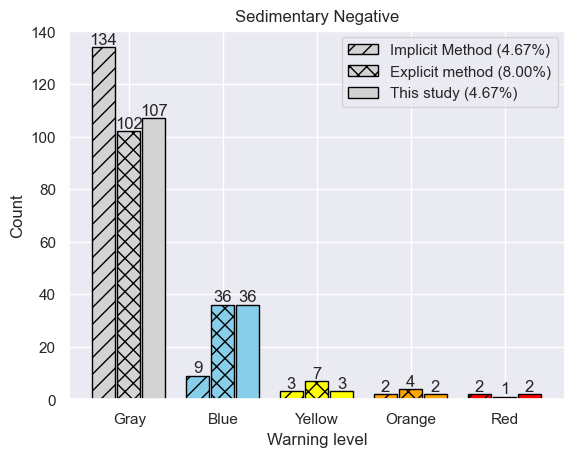

In [127]:
n,bins,patches=plt.hist([mm1[y0],mm2[y0],mm3[y0]],bins=[0, 1, 2, 3, 4, 5],edgecolor='black',width=0.25)

for i in range(len(patches)):
    c=0
    for rect in patches[i].patches:
        rect.set_hatch(hatches[i])
        rect.set_facecolor(colors[c])
        height=rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2,height,f'{int(height)}',ha='center',va='bottom')
        c+=1

plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], ['Gray', 'Blue', 'Yellow', 'Orange', 'Red'])
plt.title('Sedimentary Negative')
plt.xlabel('Warning level')
plt.ylabel('Count')
plt.legend(['Implicit Method (%.2f%%)'%(100*sum(mm1[y0]>1)/len(y0)),'Explicit method (%.2f%%)'%(100*sum(mm2[y0]>1)/len(y0)),'This study (%.2f%%)'%(100*sum(mm3[y0]>1)/len(y0))])

Precip td : 0.34752570090386165
Precip -1d : 0.12229155329766987
Precip -2d : 0.06349474668882048
Precip -3d : 0.05756430532689111
Slope Length : 0.04663935789530085
Slope : 0.04591054472285661
Precip -4d : 0.04449591657683147
Water Content : 0.0380052963832307
Plasticity Index : 0.03800157266236958
Aspect : 0.034202481994329285
Compression Coefficient : 0.03396176888764795
Cohesion : 0.03316430967004909
Slope Height : 0.032479132758502186
Internal Friction Angle : 0.031314329842949774
Slope Width : 0.03094898238868933


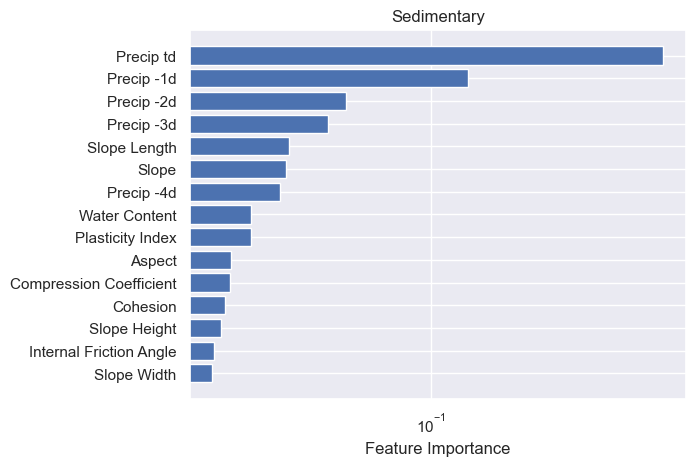

In [129]:
feature_importances = clf.feature_importances_
fn = [list(X.columns)[i] for i in np.argsort(feature_importances)[::-1]]
feature_importances_sorted = np.array(sorted(clf.feature_importances_)[::-1])

# plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')
plt.barh(range((len(fn))),feature_importances_sorted,tick_label=fn)
plt.title('Sedimentary')
plt.xlabel('Feature Importance')
plt.xscale('log')
plt.gca().invert_yaxis()
for i in range(len(fn)):
    print(fn[i],':',feature_importances_sorted[i])